In [2]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [8]:
'''Data Mining Project
'''

# Preprocessing and initial data exploration
df = pd.read_csv('./Inpatient_Data_2011_CSV/Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv')
df.describe()

,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
count,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304,36133.958434,9707.477867,8494.495174
std,151563.671767,27854.323080,51.104042,35065.365905,7664.642652,7309.467247
min,10001.000000,1040.000000,11.000000,2459.400000,2673.000000,1148.909091
25%,110092.000000,27261.000000,17.000000,15947.166670,5234.500000,4192.354839
50%,250007.000000,44309.000000,27.000000,25245.823530,7214.100000,6158.465116
75%,380075.000000,72901.000000,49.000000,43232.592590,11286.400000,10056.882350
max,670077.000000,99835.000000,3383.000000,929118.909100,156158.181800,154620.818200


In [4]:
pandas_profiling.ProfileReport(df)

Number of variables,12
Number of observations,163065
Total Missing (%),0.0%
Total size in memory,14.9 MiB
Average record size in memory,96.0 B
Numeric,5
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [9]:
'''Preprocessing'''
print(df.columns)

encoder = preprocessing.OrdinalEncoder()

cols = ['DRG Definition','Provider Name','Provider Street Address', 'Provider City', 'Provider State','Hospital Referral Region (HRR) Description']
for col in cols:
    topic = np.array(df[col].unique()).reshape(-1,1)
    encoder.fit(topic)
    df[col] = encoder.transform(np.array(df[col]).reshape(-1,1))

df.head()

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region (HRR) Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments'],
      dtype='object')


,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,0.0,10001,2518.0,318.0,454.0,1.0,36301,2.0,91,32963.07692,5777.241758,4763.736264
1,0.0,10005,1498.0,1493.0,177.0,1.0,35957,1.0,14,15131.85714,5787.571429,4976.714286
2,0.0,10006,729.0,1229.0,582.0,1.0,35631,1.0,24,37560.37500,5434.958333,4453.791667
3,0.0,10011,2722.0,2290.0,162.0,1.0,35235,1.0,25,13998.28000,5417.560000,4129.160000
4,0.0,10016,2444.0,86.0,13.0,1.0,35007,1.0,18,31633.27778,5658.333333,4851.444444


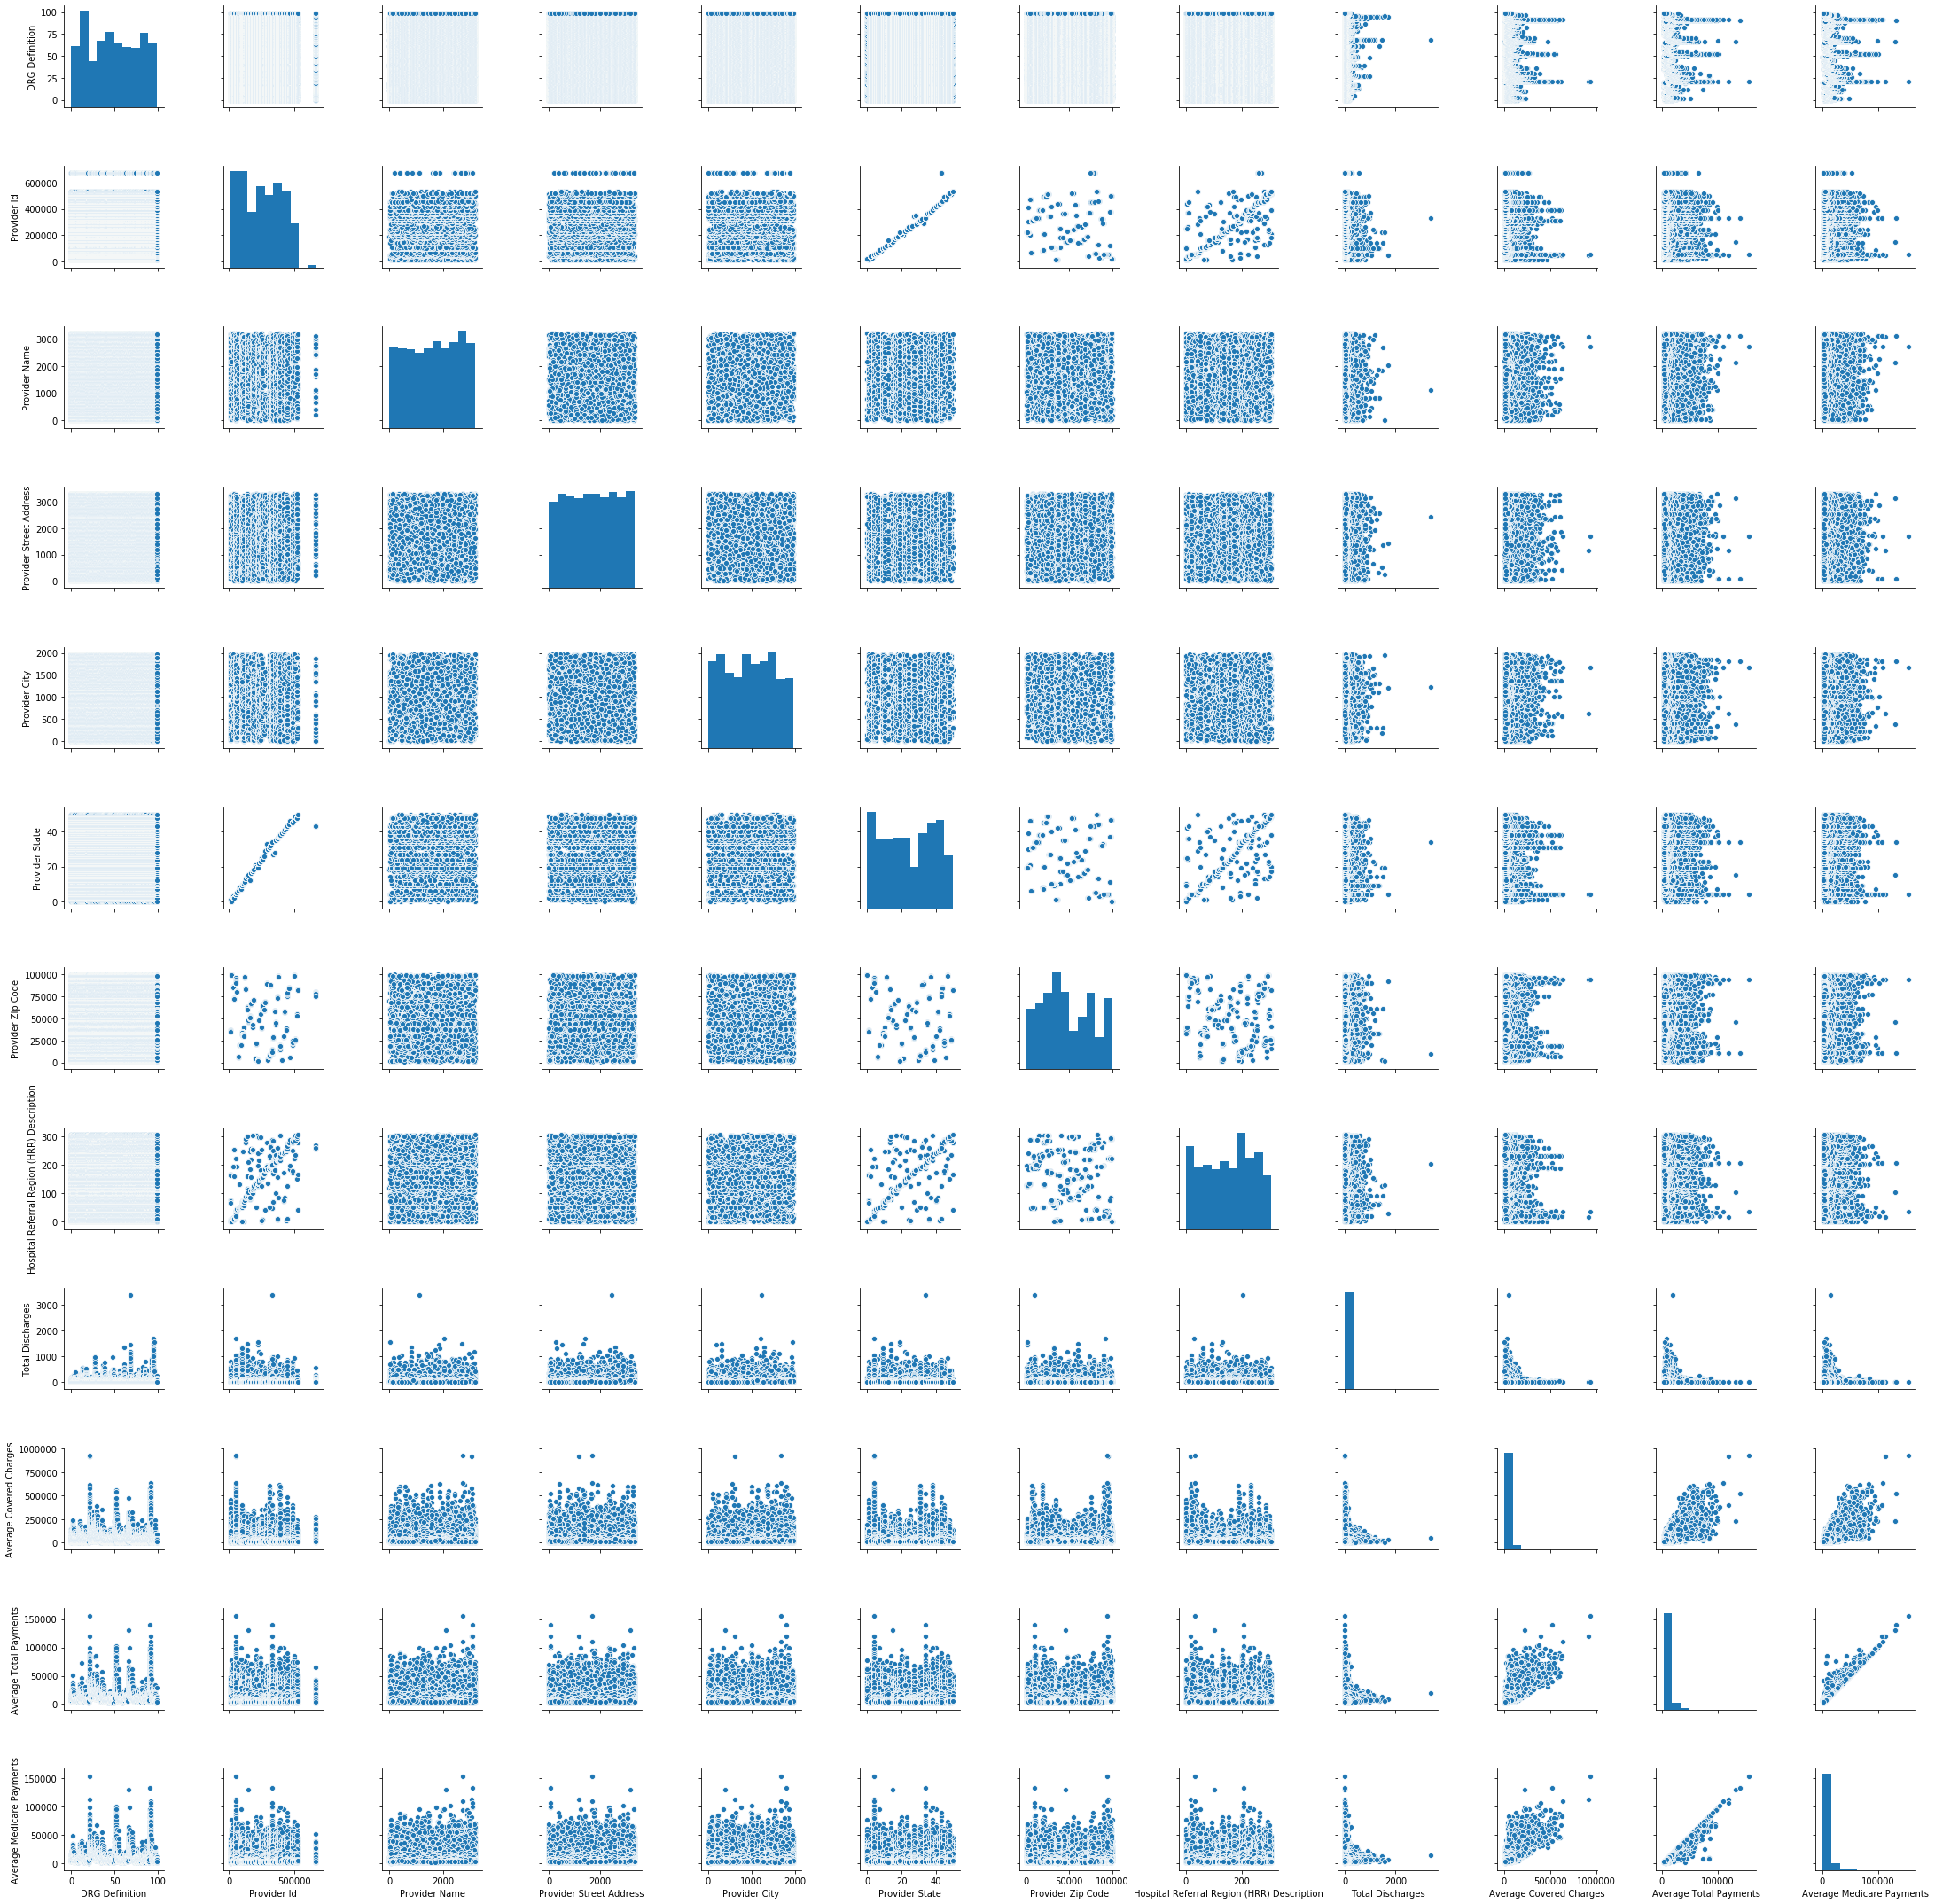

In [12]:
# Warning: This will take a bit of time to run so be prepared before running (possible 20+ mins) see file it is saved to
sns.pairplot(df)
plt.savefig('Column_by_Column.png')

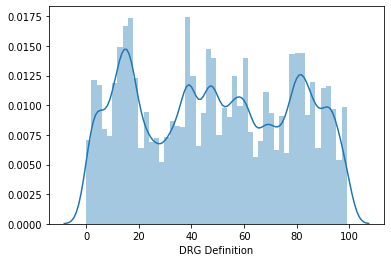

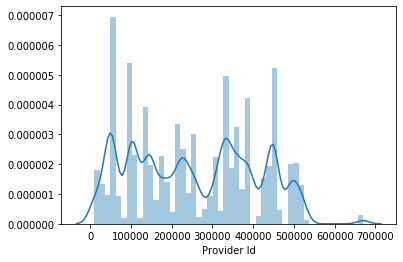

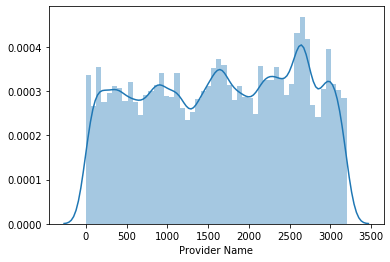

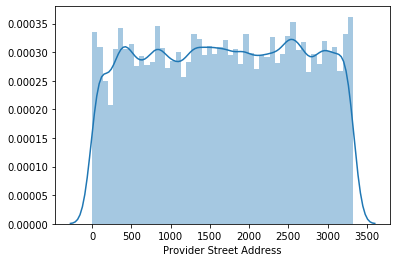

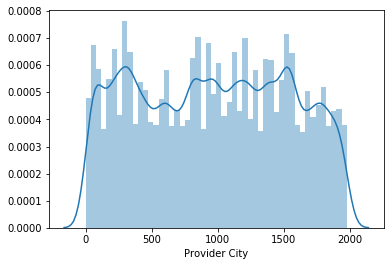

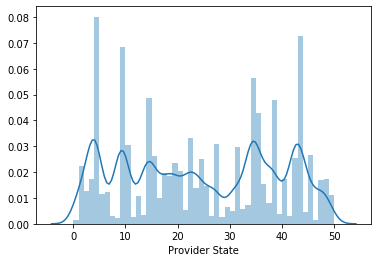

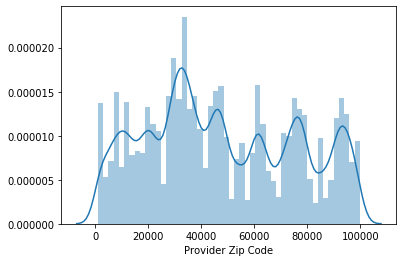

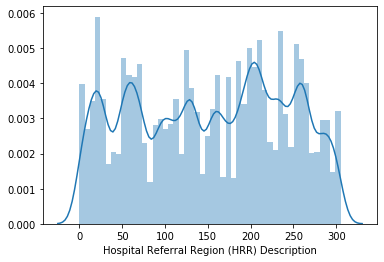

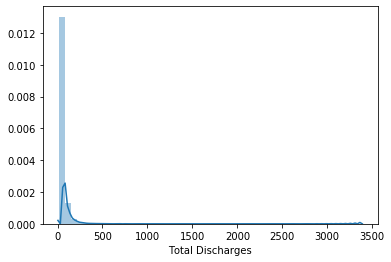

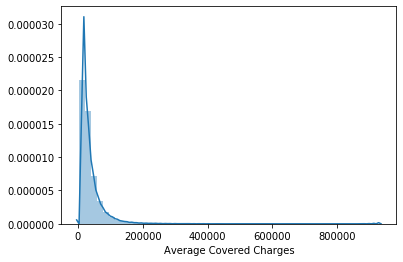

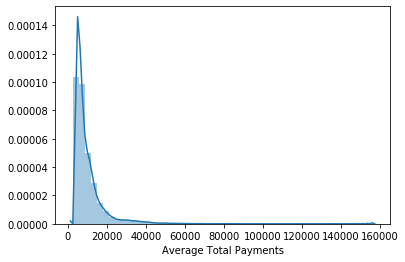

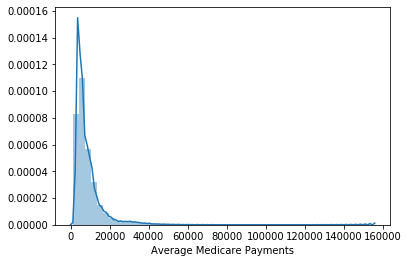

In [27]:
# Bar graphs that are more readable
i = 0
for col in df.columns:
    plt.figure(i)
    sns.distplot(df[col])
    i+=1

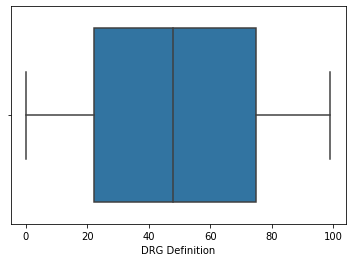

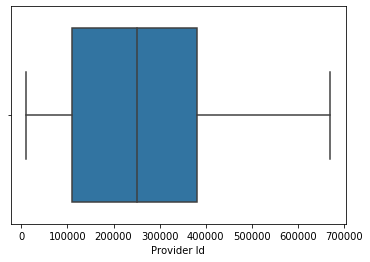

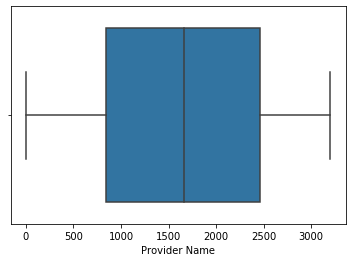

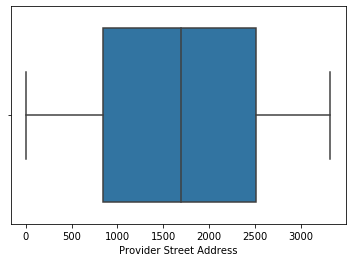

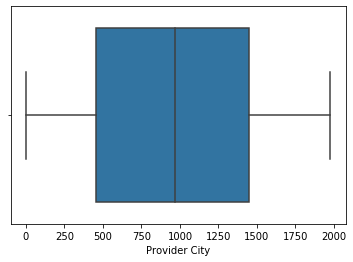

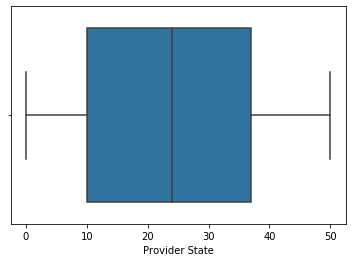

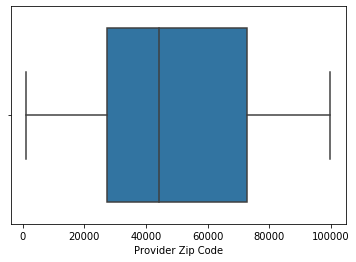

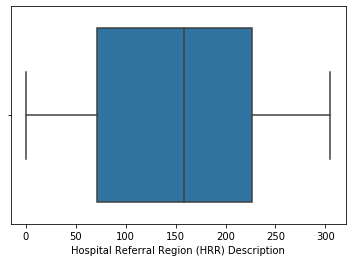

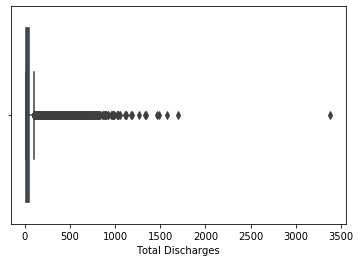

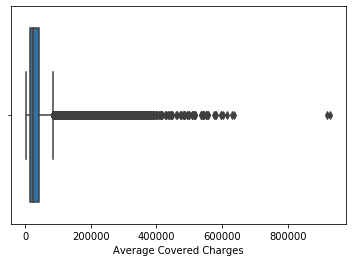

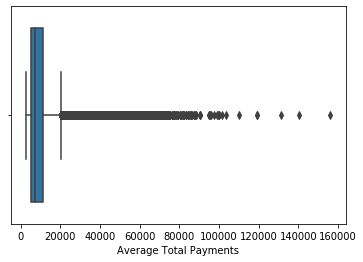

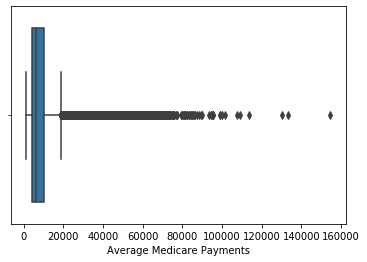

In [23]:
# Box plots of data
i = 0
for col in df.columns:
    plt.figure(i)
    sns.boxplot(df[col])
    i+=1